<a href="https://colab.research.google.com/github/beratcmn/tensorflow-quickdraw-recognition/blob/main/test_models/model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since I already created a somewhat successful model, I'll mess around with different models on the same problem.

### Downloading the libaries

In [ ]:
!pip install quickdraw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing the libraries

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

import numpy as np
from pathlib import Path
from quickdraw import QuickDrawDataGroup
from matplotlib import pyplot as plt

tf.__version__

'2.11.0'

### Getting the doodles

In [ ]:
image_size = (64, 64)
categories = ["airplane", "apple", "bicycle", "car", "cat", "cloud", "dog", "hamburger", "fish", "flower", "banana", "bird", "eye", "fork", "hat"]
max_drawings = 3000

def generate_class_images(name, max_drawings, recognized):
    directory = Path("data/" + name)

    if not directory.exists():
        directory.mkdir(parents=True)

    images = QuickDrawDataGroup(name, max_drawings=max_drawings, recognized=recognized)
    for img in images.drawings:
        filename = directory.as_posix() + "/" + str(img.key_id) + ".png"
        img.get_image(stroke_width=3).resize(image_size).save(filename)

for label in categories:
    generate_class_images(label, max_drawings=max_drawings, recognized=True)

downloading airplane from https://storage.googleapis.com/quickdraw_dataset/full/binary/airplane.bin
download complete
loading airplane drawings
load complete
downloading apple from https://storage.googleapis.com/quickdraw_dataset/full/binary/apple.bin
download complete
loading apple drawings
load complete
downloading bicycle from https://storage.googleapis.com/quickdraw_dataset/full/binary/bicycle.bin
download complete
loading bicycle drawings
load complete
downloading car from https://storage.googleapis.com/quickdraw_dataset/full/binary/car.bin
download complete
loading car drawings
load complete
downloading cat from https://storage.googleapis.com/quickdraw_dataset/full/binary/cat.bin
download complete
loading cat drawings
load complete
downloading cloud from https://storage.googleapis.com/quickdraw_dataset/full/binary/cloud.bin
download complete
loading cloud drawings
load complete
downloading dog from https://storage.googleapis.com/quickdraw_dataset/full/binary/dog.bin
download comp

### Creating the datasets

In [ ]:
batch_size = 64

train_dataset = image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

Found 45000 files belonging to 15 classes.
Using 36000 files for training.
Found 45000 files belonging to 15 classes.
Using 9000 files for validation.


### Explore the data

In [ ]:
for images, labels in train_dataset.take(1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

numpy_images.shape, numpy_images[0].shape

((64, 64, 64, 1), (64, 64, 1))

### Displaying examples

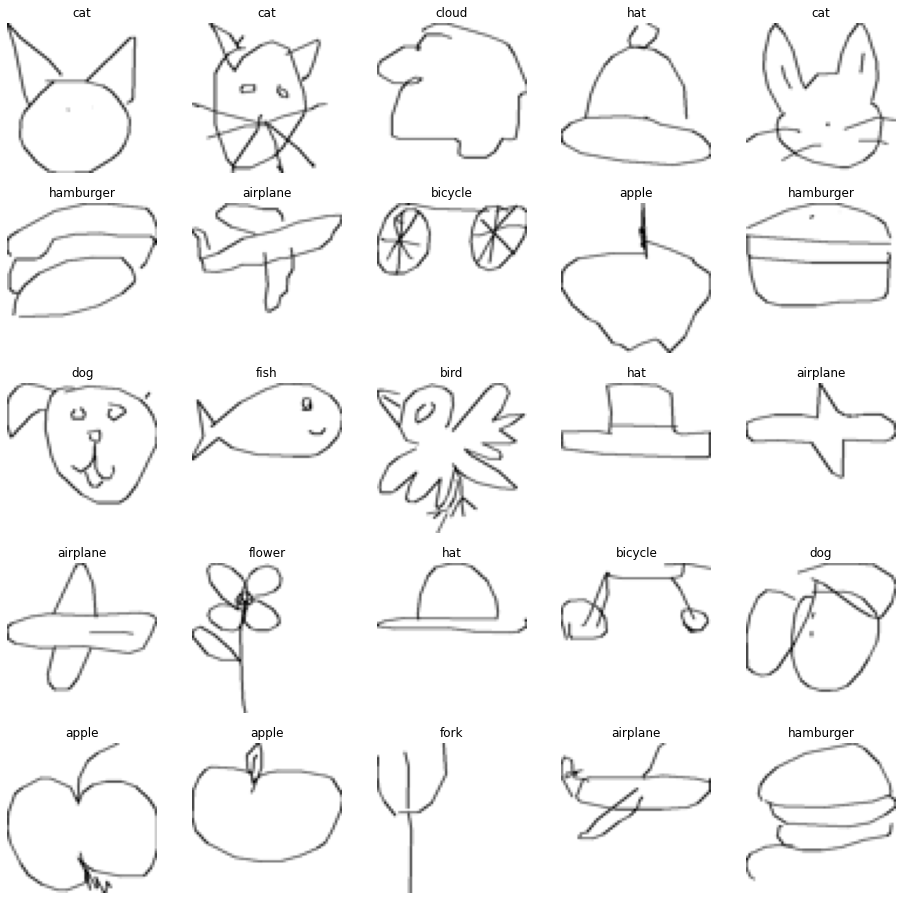

In [ ]:
plt.figure(figsize=(16, 16))
for images, labels in train_dataset.take(1):
  for i in range(25):
    plt.subplot(5,5,i+1)
    data = images[i].numpy().astype("uint8")
    plt.imshow(data, cmap='gray', vmin=0, vmax=255)
    plt.title(train_dataset.class_names[labels[i]])
    plt.axis("off")

### Creating a model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1. / 255, input_shape=(64, 64, 1)), # Input layer
    tf.keras.layers.BatchNormalization(),

    # tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same"),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same"),
    
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same"),

    tf.keras.layers.ReLU(),

    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same"),

    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(len(categories), activation="softmax") # Output layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 1)         0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                        

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
epochs = 16

model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = epochs
)

model.save("./models/test_model")

Epoch 1/16


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 56/563 [=>............................] - ETA: 9:53 - loss: 2.3107 - accuracy: 0.3133

KeyboardInterrupt: ignored

### Testing the accuracy

In [ ]:
test_loss, test_acc = model.evaluate(validation_dataset, verbose=1)

141/141 [==============================] - 3s 22ms/step - loss: 0.5586 - accuracy: 0.8923
